#### Bertrand's paradox

The Bertrand paradox is generally presented as follows: Consider an equilateral triangle inscribed in a circle. Suppose a chord of the circle is chosen at random. What is the probability that the chord is longer than a side of the triangle?

Bertrand came up with three different ways to choose a random chord, each of which leads to a different answer!

In this notebook, we investigate these methods.






In [1]:
import numpy as np
import matplotlib.pyplot as plt

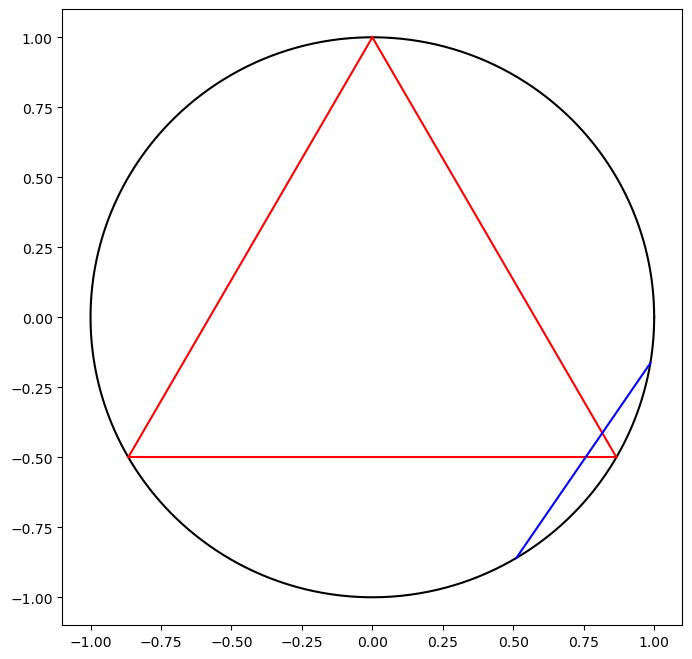

In [2]:
fig, ax = plt.subplots(1,1,figsize=(8,8))

# Generate two random points on the circle
theta1 = np.random.uniform(0, 2*np.pi)
xi1 = np.cos(theta1)
yi1 = np.sin(theta1)

theta2 = np.random.uniform(0, 2*np.pi)
xi2 = np.cos(theta2)
yi2 = np.sin(theta2)

length1 = np.sqrt((xi1-xi2)**2 + (yi1-yi2)**2)

thetac = np.linspace(0, 2*np.pi, 1000)
xc = np.cos(thetac)
yc = np.sin(thetac)
ax.plot(xc, yc, 'k')

ax.plot([0, np.sqrt(3)/2], [1, -0.5], 'r')
ax.plot([0, -np.sqrt(3)/2], [1, -0.5], 'r')
ax.plot([-np.sqrt(3)/2, np.sqrt(3)/2], [-0.5, -0.5], 'r')

ax.plot([xi1, xi2], [yi1, yi2], 'b')

plt.show()

### Method 1

The first method is call the random endpoints method.  The algorithm is as follows:

1. Choose two random points on the circle, at random positions.
2. Calculate the length of the chord that joins them.

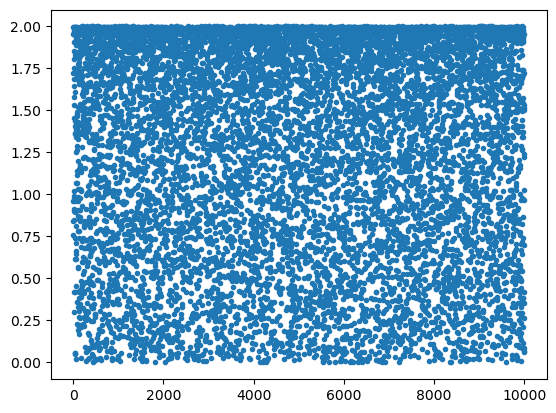

In [41]:
# Generate random points on the circle

n = 10000   # number of points

theta1 = np.random.uniform(0, 2*np.pi, n)
xi1 = np.cos(theta1)
yi1 = np.sin(theta1)

theta2 = np.random.uniform(0, 2*np.pi, n)
xi2 = np.cos(theta2)
yi2 = np.sin(theta2)

length1 = np.sqrt((xi1-xi2)**2 + (yi1-yi2)**2)

plt.plot(np.arange(n), length1, '.')


Method 1 probability = 0.3327


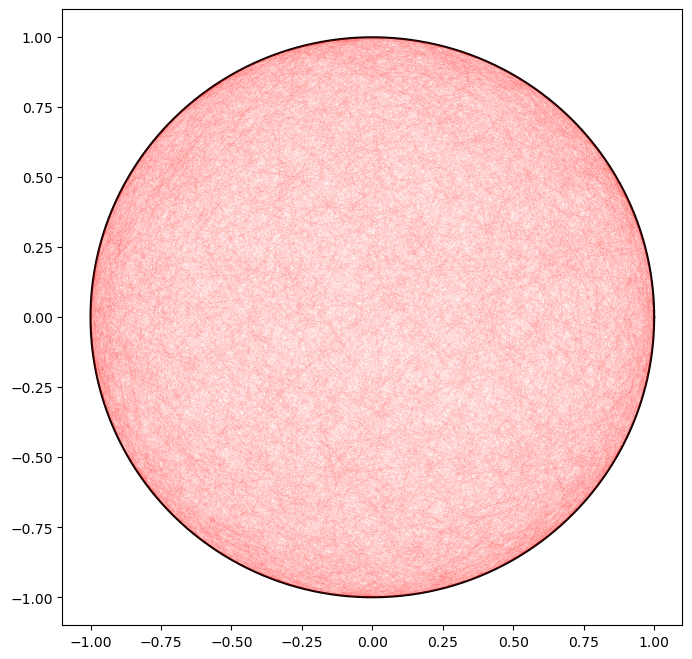

In [42]:
fig, ax = plt.subplots(1,1,figsize=(8,8))

thetac = np.linspace(0, 2*np.pi, 1000)
xc = np.cos(thetac)
yc = np.sin(thetac)
ax.plot(xc, yc, 'k')

count1 = 0
for i in range(n):
    if length1[i] > np.sqrt(3):
        count1 += 1
    ax.plot([xi1[i], xi2[i]], [yi1[i], yi2[i]], 'r', linewidth=0.01)

print(f"Method 1 probability = {count1/n}")
plt.show()

### Method 2

The second method is called the random radial method. The algorithm is as follows:

1. Choose a random point on the circle.
2. Construct the radius from the centre of the circle to this point.
3. Choose a random point on this radius.
4. Construct the chord perpendicular to the radius at this point.
5. Calculate the length of the chord.

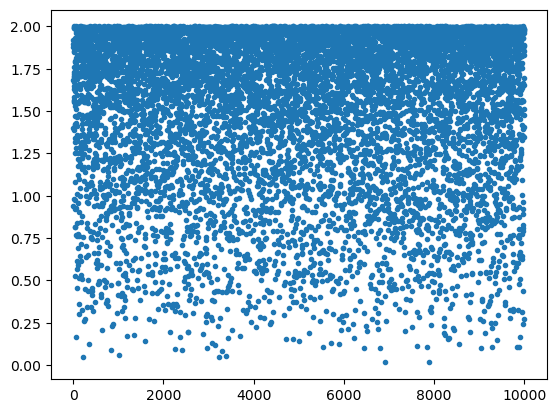

In [43]:
# Step 1 and 2
theta = np.random.uniform(0, 2*np.pi, n)
x = np.cos(theta)
y = np.sin(theta)

# Step 3
fraction = np.random.uniform(0, 1, n)
x1 = fraction*x
y1 = fraction*y

m = -x1/y1
b = y1 - m*x1

# Step 4
# From Wolfram-Alpha, find intersection of circle of radius 1 and the line y = mx + b

xint1 = (-np.sqrt(-b**2+m**2+1) - b*m)/(m**2+1)
yint1 = m*xint1 + b

xint2 = (np.sqrt(-b**2+m**2+1) - b*m)/(m**2+1)
yint2 = m*xint2 + b

length2 = np.sqrt((xint1-xint2)**2 + (yint1-yint2)**2)

plt.plot(np.arange(n), length2, '.')

#print (xint1, yint1)
#print (xint2, yint2)

Method 2 probability = 0.5013


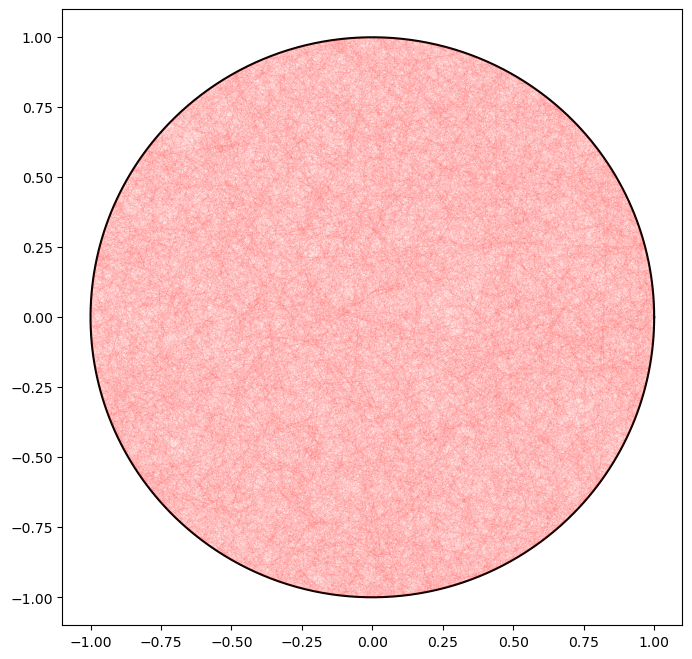

In [44]:
fig, ax = plt.subplots(1,1,figsize=(8,8))

thetac = np.linspace(0, 2*np.pi, 1000)
xc = np.cos(thetac)
yc = np.sin(thetac)
ax.plot(xc, yc, 'k')

count2 = 0
for i in range(n):
    if length2[i] > np.sqrt(3):
        count2 += 1
    ax.plot([xint1[i], xint2[i]], [yint1[i], yint2[i]], 'r', linewidth=0.01)

print(f"Method 2 probability = {count2/n}")
plt.show()

### Method 3

The third method is called the random midpoint method. The algorithm is as follows:

1. Choose a random point within the circle.
2. Construct the chord with this point as its midpoint.
3. Calculate the length of the chord.

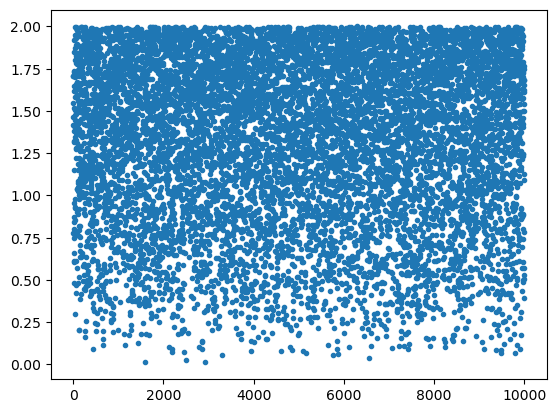

In [52]:
# Step 1
chosen = 0
length3 = np.zeros(n)
xint3 = np.zeros(n)
xint4 = np.zeros(n)
yint3 = np.zeros(n)
yint4 = np.zeros(n)

while chosen < n:
    x1 = np.random.uniform(-1, 1)
    y1 = np.random.uniform(-1, 1)
    radius = np.sqrt(x1**2 + y1**2)

    if radius <= 1:

        # Step 2
        m = -x1/y1
        b = y1 - m*x1

        xint3[chosen] = (-np.sqrt(-b**2+m**2+1) - b*m)/(m**2+1)
        yint3[chosen] = m*xint3[chosen] + b

        xint4[chosen] = (np.sqrt(-b**2+m**2+1) - b*m)/(m**2+1)
        yint4[chosen] = m*xint4[chosen] + b

        length3[chosen] = np.sqrt((xint3[chosen]-xint4[chosen])**2 + (yint3[chosen]-yint4[chosen])**2)
        chosen += 1

plt.plot(np.arange(n), length3, '.')


Method 3 probability = 0.2608


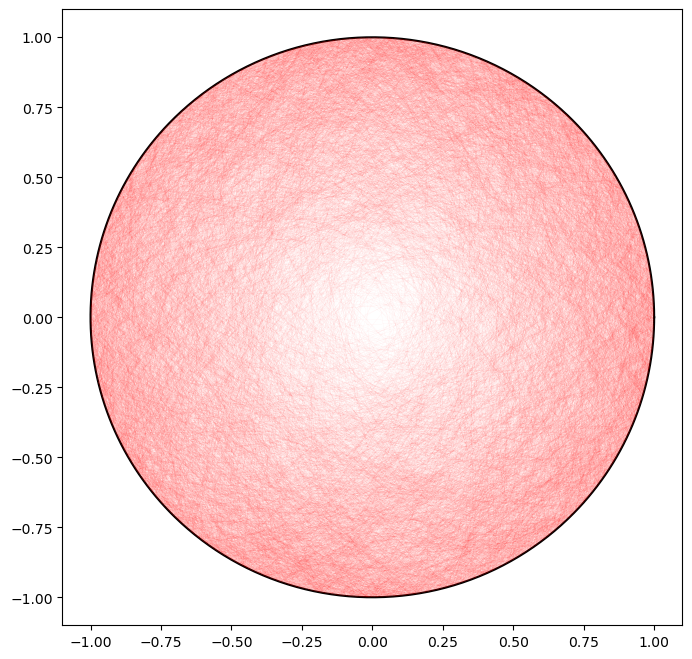

In [53]:
fig, ax = plt.subplots(1,1,figsize=(8,8))

thetac = np.linspace(0, 2*np.pi, 1000)
xc = np.cos(thetac)
yc = np.sin(thetac)
ax.plot(xc, yc, 'k')

count3 = 0
for i in range(n):
    if length3[i] > np.sqrt(3):
        count3 += 1
    ax.plot([xint3[i], xint4[i]], [yint3[i], yint4[i]], 'r', linewidth=0.01)

print(f"Method 3 probability = {count3/n}")
plt.show()

# Method 4

1) Generate a point randomly within the circle.
2) Choose a random angle for a chord passing through that point.
3) Calculate the length of the chord passing through that point, at the chosen random angle

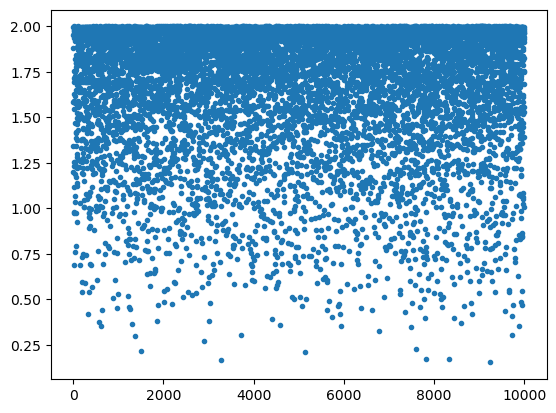

In [47]:
# Step 1
chosen = 0
length4 = np.zeros(n)
xint5 = np.zeros(n)
xint6 = np.zeros(n)
yint5 = np.zeros(n)
yint6 = np.zeros(n)

# Step 2
while chosen < n:
    x1 = np.random.uniform(-1, 1)
    y1 = np.random.uniform(-1, 1)
    radius = np.sqrt(x1**2 + y1**2)

    if radius <= 1:

        # Step 3
        theta = np.random.uniform(0, 2*np.pi)
        m = -np.cos(theta)/np.sin(theta)
        b = y1 - m*x1

        xint5[chosen] = (-np.sqrt(-b**2+m**2+1) - b*m)/(m**2+1)
        yint5[chosen] = m*xint5[chosen] + b

        xint6[chosen] = (np.sqrt(-b**2+m**2+1) - b*m)/(m**2+1)
        yint6[chosen] = m*xint6[chosen] + b

        length4[chosen] = np.sqrt((xint5[chosen]-xint6[chosen])**2 + (yint5[chosen]-yint6[chosen])**2)
        chosen += 1

plt.plot(np.arange(n), length4, '.')

Method 4 probability = 0.6064


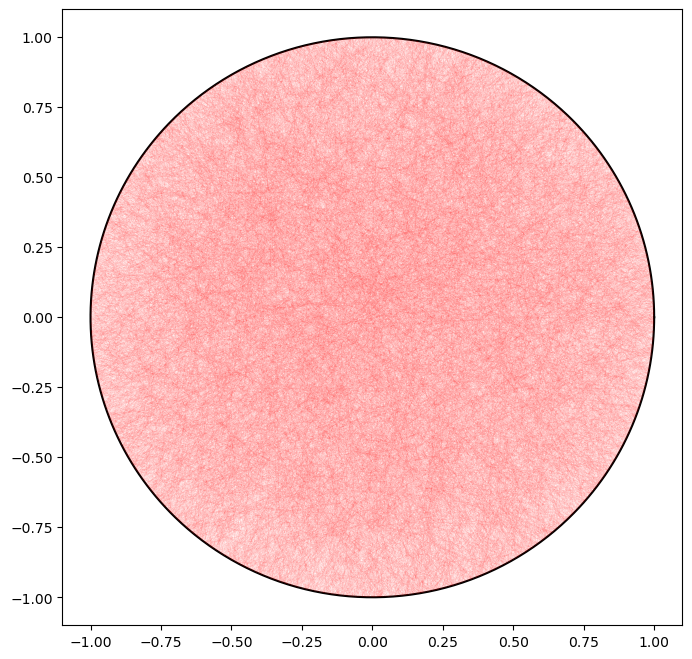

In [54]:
fig, ax = plt.subplots(1,1,figsize=(8,8))

thetac = np.linspace(0, 2*np.pi, 1000)
xc = np.cos(thetac)
yc = np.sin(thetac)
ax.plot(xc, yc, 'k')

count4 = 0
for i in range(n):
    if length4[i] > np.sqrt(3):
        count4 += 1
    ax.plot([xint5[i], xint6[i]], [yint5[i], yint6[i]], 'r', linewidth=0.01)

print(f"Method 4 probability = {count4/n}")
plt.show()

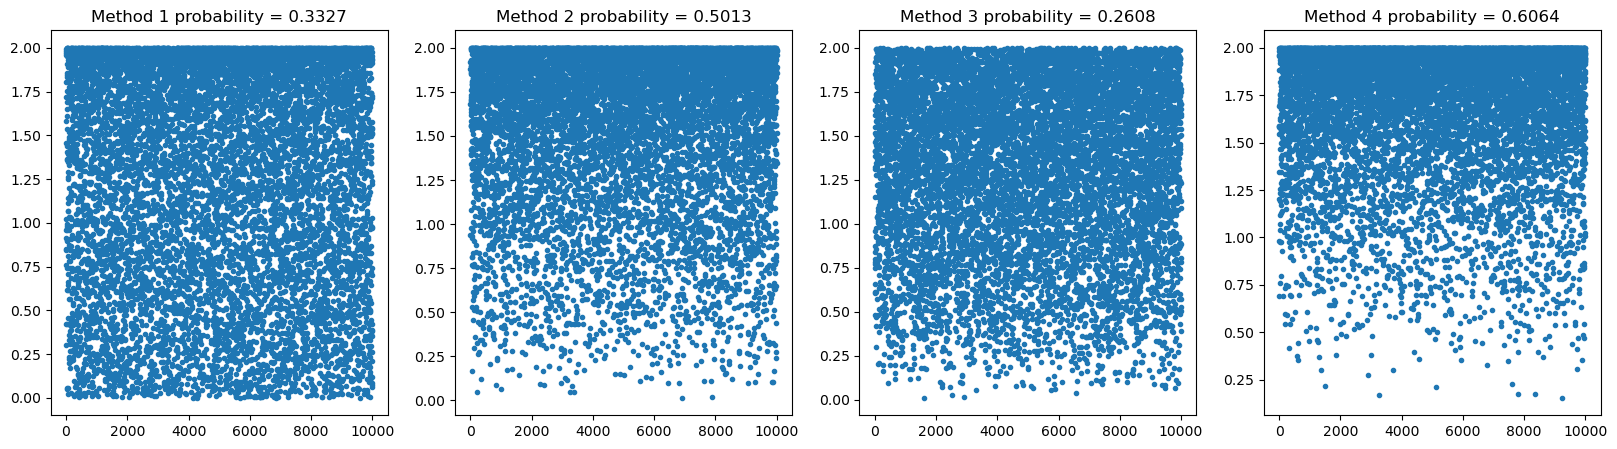

In [55]:
fix, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].plot(np.arange(n), length1, '.')
ax[0].set_title(f"Method 1 probability = {count1/n}")
ax[1].plot(np.arange(n), length2, '.')
ax[1].set_title(f"Method 2 probability = {count2/n}")
ax[2].plot(np.arange(n), length3, '.')
ax[2].set_title(f"Method 3 probability = {count3/n}")
ax[3].plot(np.arange(n), length4, '.')
ax[3].set_title(f"Method 4 probability = {count4/n}")
plt.show()

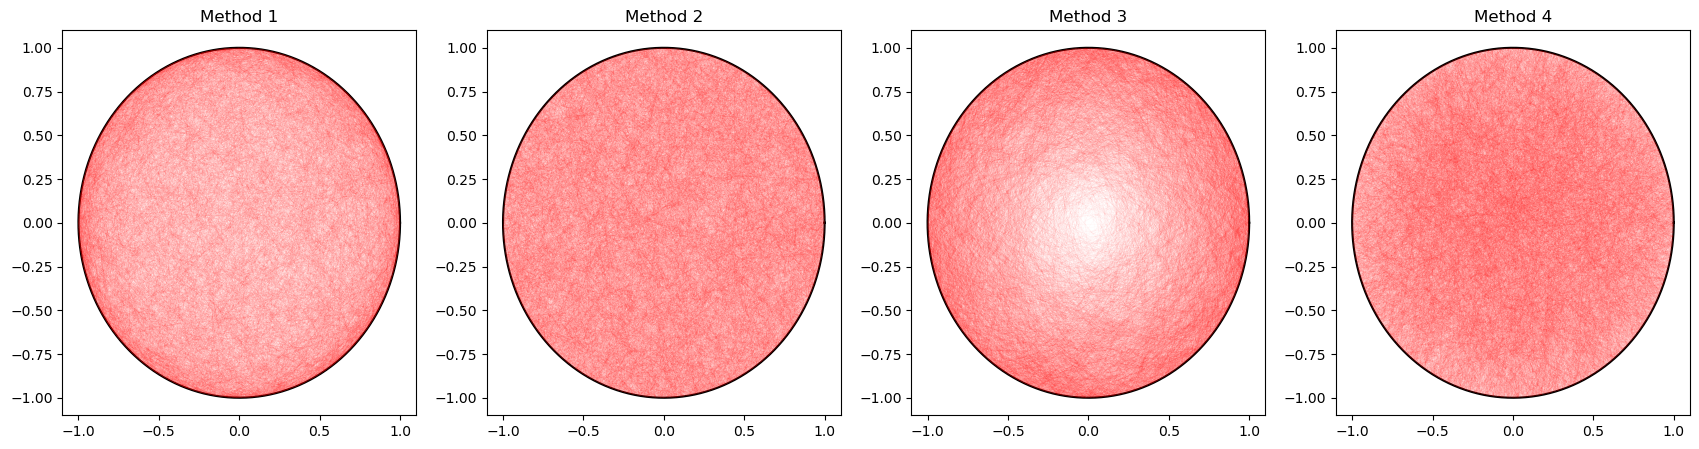

In [56]:
fig, ax = plt.subplots(1, 4, figsize=(21, 5))

ax[0].set_title("Method 1")
ax[0].plot(xc, yc, 'k')
for i in range(n):
    ax[0].plot([xi1[i], xi2[i]], [yi1[i], yi2[i]], 'r', linewidth=0.01)

ax[1].set_title("Method 2")
ax[1].plot(xc, yc, 'k')
for i in range(n):
    ax[1].plot([xint1[i], xint2[i]], [yint1[i], yint2[i]], 'r', linewidth=0.01)

ax[2].set_title("Method 3")
ax[2].plot(xc, yc, 'k')
for i in range(n):
    ax[2].plot([xint3[i], xint4[i]], [yint3[i], yint4[i]], 'r', linewidth=0.01)

ax[3].set_title("Method 4")
ax[3].plot(xc, yc, 'k')
for i in range(n):
    ax[3].plot([xint5[i], xint6[i]], [yint5[i], yint6[i]], 'r', linewidth=0.01)

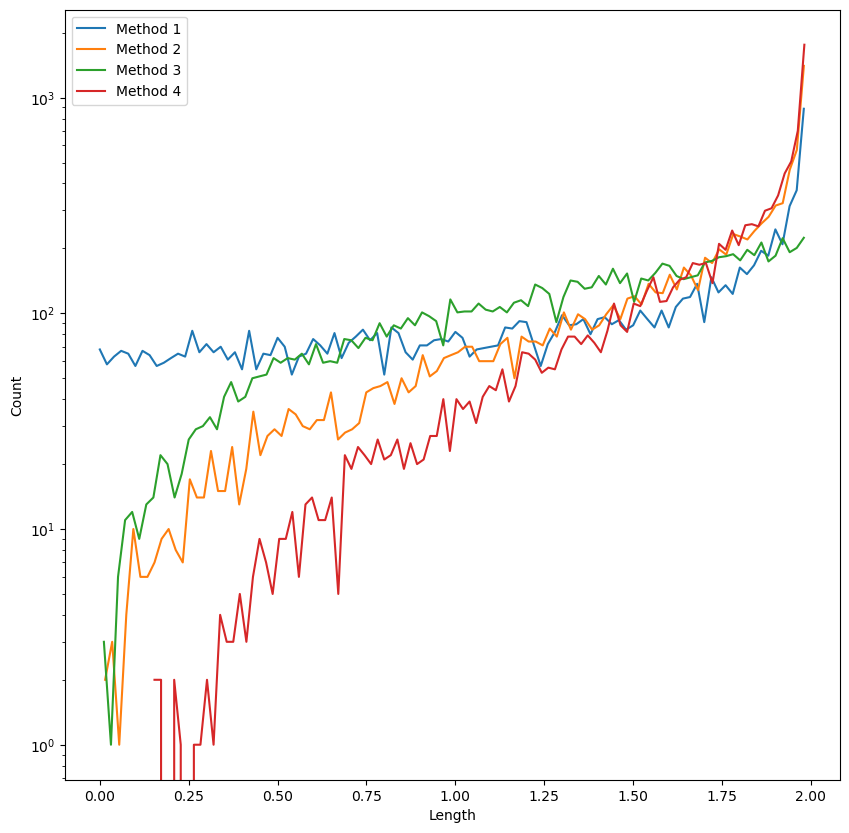

In [57]:
fig = plt.figure(figsize=(10, 10))
counts, bins = np.histogram(length1, bins=100)
plt.plot(bins[:-1], counts, label="Method 1")
counts, bins = np.histogram(length2, bins=100)
plt.plot(bins[:-1], counts, label="Method 2")
counts, bins = np.histogram(length3, bins=100)
plt.plot(bins[:-1], counts, label="Method 3")
counts, bins = np.histogram(length4, bins=100)
plt.plot(bins[:-1], counts, label="Method 4")
plt.yscale('log')
plt.ylabel("Count")
plt.xlabel("Length")
plt.legend()
plt.show()

We can see from both the Length vs Count and Length vs N plots that Method 4 yields a significantly higher proportion of longer length chords, with very few low length chords. This is reflecte in the probabilities, with Method 4 having a clear lead at ~0.6.